In [17]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler  # or MinMaxScaler

# Load the data
train_df = pd.read_csv('data-v5/train/train.csv')
test_df = pd.read_csv('data-v5/test/test.csv')
valid_df = pd.read_csv('data-v5/valid/valid.csv')

# Combine train and valid datasets for training
train_df = pd.concat([train_df, valid_df])

train_df = train_df.dropna()  
test_df = test_df.dropna()

# Convert the number of bags used into classes based on 0.1 kg increments
train_df['bag_class'] = (train_df['Bags used'] * 10).round().astype(int)
test_df['bag_class'] = (test_df['Bags used'] * 10).round().astype(int)

# Features (pothole area) and labels (bag classes)
X_train = train_df[['pothole_area_mm2']]
y_train = train_df['bag_class']
X_test = test_df[['pothole_area_mm2']]
y_test = test_df['bag_class']


# Initialize the scaler
scaler = MinMaxScaler()  # or MinMaxScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predict and evaluate the model on the test data
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 0.5405405405405406
Classification Report:
               precision    recall  f1-score   support

           2       0.50      0.14      0.22         7
           5       0.54      1.00      0.70        19
          10       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         2
          30       0.00      0.00      0.00         1
         150       0.00      0.00      0.00         1

    accuracy                           0.54        37
   macro avg       0.13      0.14      0.12        37
weighted avg       0.37      0.54      0.40        37



In [19]:
from sklearn.metrics import r2_score
# Calculate R^2 value
# Note: R^2 is generally used for regression problems. For classification problems,
# it's less common, but we can still compute it to see how well the model performs.
# Convert y_pred to probabilities to calculate R^2 value
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
r2 = r2_score(y_test, y_pred_prob)

print(f"R^2 value: {r2}")

R^2 value: -0.20425813331077003


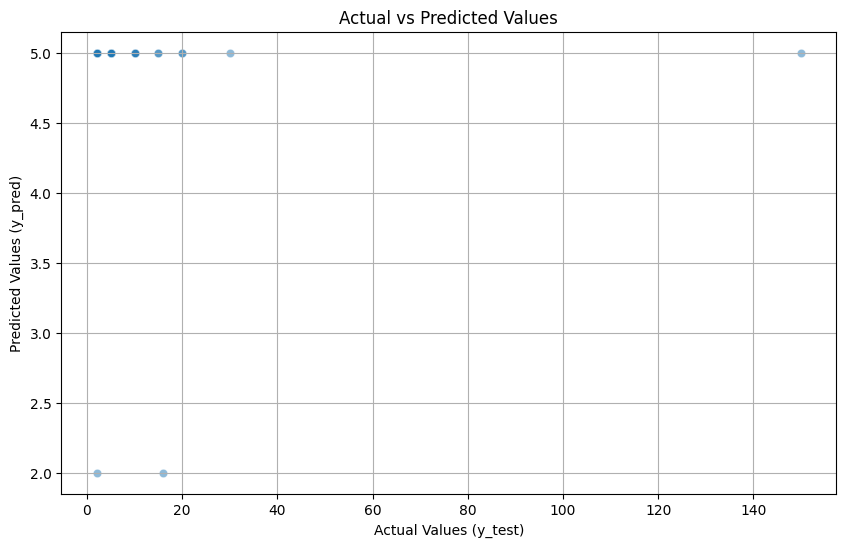

In [18]:
import matplotlib.pyplot as plt

# Plot y_pred vs y_test
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='w', linewidth=0.5)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

Linear Regression - MSE: 5.757406039337246, R^2: -0.01022788353539772
Random Forest Regression - MSE: 6.0903276554054075, R^2: -0.06864424279263681


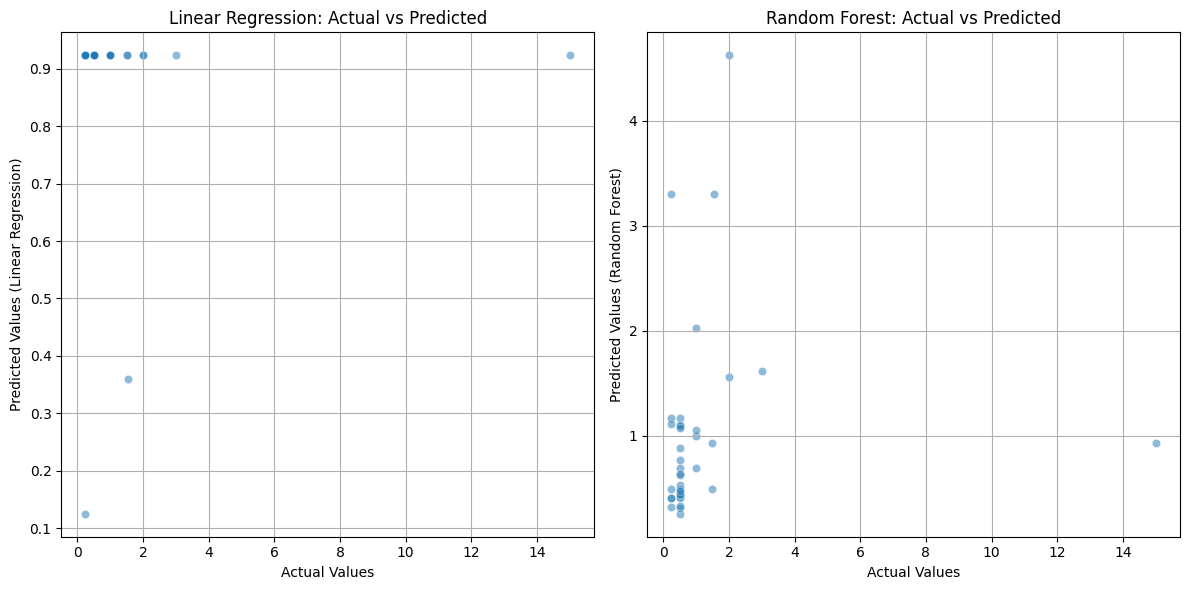

In [23]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data
train_df = pd.read_csv('data-v5/train/train.csv')
test_df = pd.read_csv('data-v5/test/test.csv')
valid_df = pd.read_csv('data-v5/valid/valid.csv')

# Combine train and valid datasets for training
train_df = pd.concat([train_df, valid_df])

train_df = train_df.dropna()  
test_df = test_df.dropna()

total_train_df = pd.concat([train_df, test_df])

train_df.to_csv('train_features.csv', index=False)

# Features (pothole area) and labels (bags used)
X_train = train_df[['pothole_area_mm2']]
y_train = train_df['Bags used']
X_test = test_df[['pothole_area_mm2']]
y_test = test_df['Bags used']

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

# Random Forest Regression Model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_scaled, y_train)
y_pred_rf = random_forest_model.predict(X_test_scaled)

# Evaluate models
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Linear Regression - MSE: {mse_linear}, R^2: {r2_linear}")
print(f"Random Forest Regression - MSE: {mse_rf}, R^2: {r2_rf}")

# Plot predictions vs actual values
plt.figure(figsize=(12, 6))

# Linear Regression Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.5, edgecolors='w', linewidth=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (Linear Regression)')
plt.title('Linear Regression: Actual vs Predicted')
plt.grid(True)

# Random Forest Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5, edgecolors='w', linewidth=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (Random Forest)')
plt.title('Random Forest: Actual vs Predicted')
plt.grid(True)

plt.tight_layout()
plt.show()
